In [1]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.covariance import empirical_covariance

%matplotlib inline


# Let's read data
data = pd.read_csv('winequality-red.csv', sep=';')
cols_to_use = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates','alcohol']
#cols_to_use = ['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates','alcohol']

X = data[cols_to_use]
Y = data['quality']



In [2]:
# Let's take a look for our data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


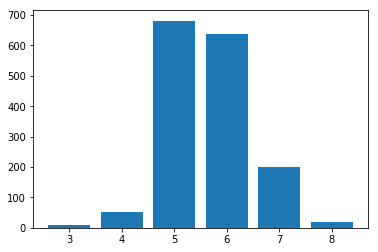

In [4]:
plt.bar(data['quality'].unique(),data['quality'].value_counts())
plt.figure( figsize=[15,6])
plt.show()


In [5]:
# Let's check if t here are any null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

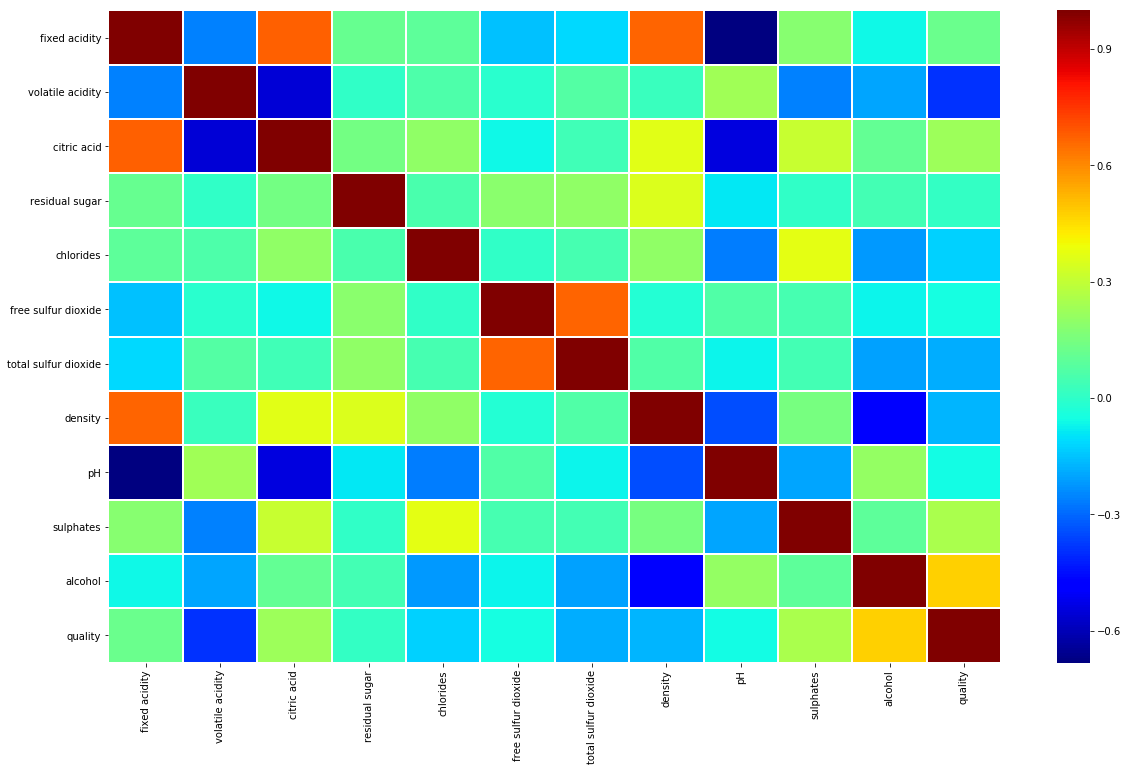

In [6]:
import seaborn as sns
# Import värikartta
import matplotlib.cm as cm

# korrelaatio 
korrelaatiot = data.corr()

# Värikartta
cmap = cm.get_cmap('jet')

# Kaavion koko
fig, ax = plt.subplots(figsize=(20,12))

# Luodaan heatmap 'korrelaatiot' -taulusta
sns.heatmap(korrelaatiot,linewidths = 1, cmap=cmap)

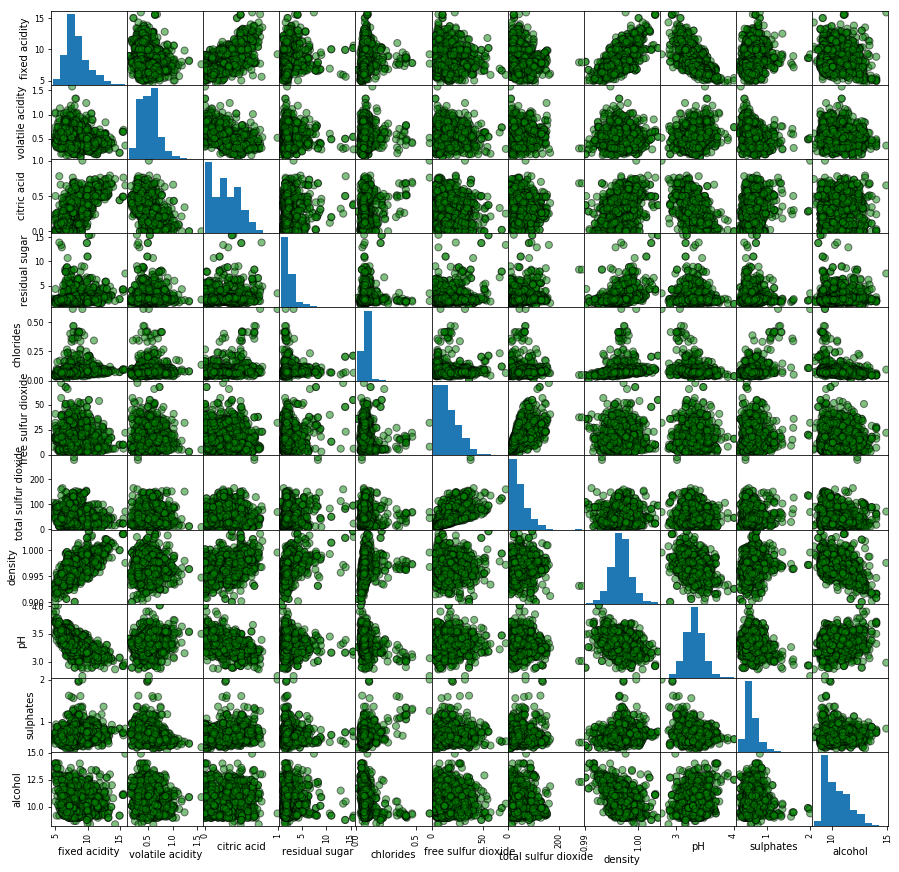

In [7]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:, 'quality']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'quality'],
                          c = color_list,
                          figsize = [15,15],
                          diagonal='hist',
                          alpha=0.5,
                          s = 200,
                          marker='.',
                          edgecolor = 'black')
plt.show()

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, train_size=0.8, test_size = 0.2)


from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#bagg = BaggingClassifier(LinearSVC(), max_samples=0.5, max_features=0.5)
#bagg = BaggingClassifier(ExtraTreesClassifier(n_estimators = 20000, max_depth = None, min_samples_split = 2, random_state = 0), max_samples=0.5, max_features=0.5)
#bagg = bagg.fit(X_train, Y_train)
#preds = bagg.predict(X_val)

model = ExtraTreesClassifier(n_estimators = 100, max_depth = None, min_samples_split = 2, random_state = 0)
model = model.fit(X_train, Y_train)
preds = model.predict(X_val)

In [9]:
model.score(X_val, Y_val)

0.69375

In [10]:
from sklearn.metrics import accuracy_score

print("Accuracy for model %.2f" % (accuracy_score(Y_val, preds) * 100))

Accuracy for model 69.38


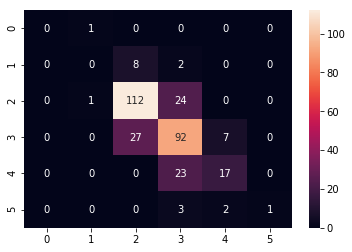

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_val, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [12]:
import xgboost as xgb
xgmodel = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
xgmodel = xgmodel.fit(X_train, Y_train)
xgpreds = xgmodel.predict(X_val)

/home/teemu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
from sklearn.metrics import accuracy_score

print("Accuracy for xgmodel %.2f" % (accuracy_score(Y_val, xgpreds) * 100))

Accuracy for xgmodel 69.38
